In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import matplotlib.pyplot as plt

%matplotlib inline

tfe.enable_eager_execution(device_policy = tfe.DEVICE_PLACEMENT_SILENT)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from model import VAE

In [3]:
device = 'gpu:0' if tfe.num_gpus() > 0 else 'cpu:0'

In [18]:
z_dim = 128

In [10]:
vae = VAE(device_name=device, learning_rate=1e-3, z_dim=z_dim)

In [5]:
# if you already have pretrained model
# vae.load(global_step="555")

In [6]:
from tensorflow.python.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
ds_train = tf.data.Dataset.from_tensor_slices((x_train,))


In [68]:
def origtest():
    testset = x_test[:10,:,:]      
    img_orig = testset.reshape(-1,28,28)
    img_orig = np.concatenate(img_orig, axis=1)
       
    input_test = testset.astype('float32')/255.
    input_test = input_test.reshape(-1, 28*28)
    input_test = tf.convert_to_tensor(input_test)
    
    z_mu, z_logsigma  = vae.encoding(input_test)
    z = vae.sampling_z(z_mu, z_logsigma)
    _, x_decode = vae.decoding(z)
    img_test = x_decode.numpy().reshape(-1,28,28)
    img_test = np.concatenate(img_test, axis=1)
            
    plt.imshow(img_orig)
    plt.show()
    plt.imshow(img_test)
    plt.show()

(10, 128)


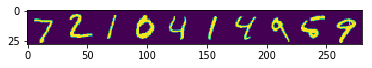

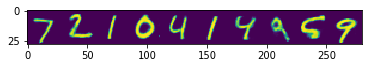

In [69]:
origtest()

[EPOCH 1 / STEP 1]
TRAIN loss   : 74232.7656
RECON loss   : 65770.9062
KL    loss   : 8461.8105
[EPOCH 3 / STEP 3]
TRAIN loss   : 53205.5117
RECON loss   : 43015.5352
KL    loss   : 10189.9316


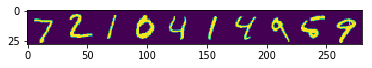

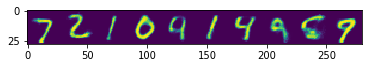

[EPOCH 1 / STEP 4]
TRAIN loss   : 51530.2305
RECON loss   : 41152.5586
KL    loss   : 10377.6680
[EPOCH 3 / STEP 6]
TRAIN loss   : 49758.1289
RECON loss   : 39250.9336
KL    loss   : 10507.1797


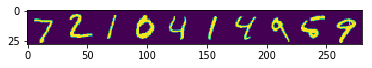

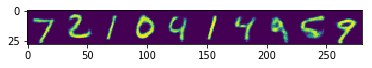

[EPOCH 1 / STEP 7]
TRAIN loss   : 49192.2266
RECON loss   : 38646.9141
KL    loss   : 10545.2910
[EPOCH 3 / STEP 9]
TRAIN loss   : 48478.2305
RECON loss   : 37895.8633
KL    loss   : 10582.3848


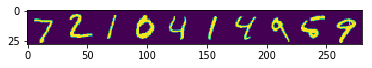

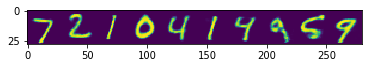

[EPOCH 1 / STEP 10]
TRAIN loss   : 48214.0781
RECON loss   : 37615.1289
KL    loss   : 10598.9619
[EPOCH 3 / STEP 12]
TRAIN loss   : 47733.3789
RECON loss   : 37129.3438
KL    loss   : 10604.0059


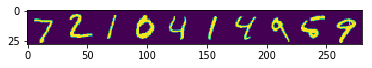

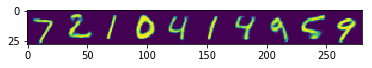

[EPOCH 1 / STEP 13]
TRAIN loss   : 47542.2188
RECON loss   : 36941.1445
KL    loss   : 10601.0781
[EPOCH 3 / STEP 15]
TRAIN loss   : 47247.3867
RECON loss   : 36625.9180
KL    loss   : 10621.4727


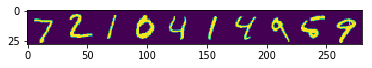

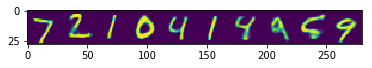

[EPOCH 1 / STEP 16]
TRAIN loss   : 47062.6289
RECON loss   : 36470.9414
KL    loss   : 10591.7041
[EPOCH 3 / STEP 18]
TRAIN loss   : 46874.1914
RECON loss   : 36253.4258
KL    loss   : 10620.7393


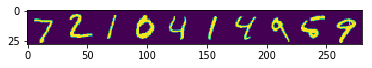

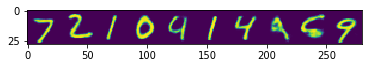

[EPOCH 1 / STEP 19]
TRAIN loss   : 46784.8945
RECON loss   : 36171.8984
KL    loss   : 10612.9775
[EPOCH 3 / STEP 21]
TRAIN loss   : 46599.6406
RECON loss   : 35975.2148
KL    loss   : 10624.4004


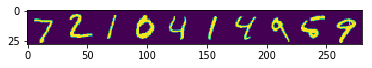

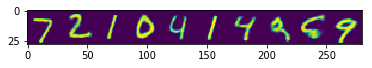

[EPOCH 1 / STEP 22]
TRAIN loss   : 46526.0430
RECON loss   : 35902.1289
KL    loss   : 10623.8818
[EPOCH 3 / STEP 24]
TRAIN loss   : 46370.5312
RECON loss   : 35751.7734
KL    loss   : 10618.7422


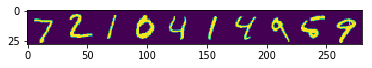

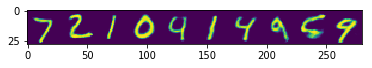

[EPOCH 1 / STEP 25]
TRAIN loss   : 46315.2344
RECON loss   : 35699.0195
KL    loss   : 10616.2188
[EPOCH 3 / STEP 27]
TRAIN loss   : 46221.3359
RECON loss   : 35582.6797
KL    loss   : 10638.6221


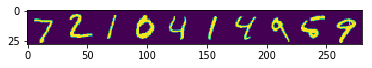

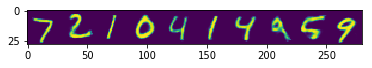

[EPOCH 1 / STEP 28]
TRAIN loss   : 46174.1953
RECON loss   : 35543.8164
KL    loss   : 10630.3652
[EPOCH 3 / STEP 30]
TRAIN loss   : 46017.4258
RECON loss   : 35385.7500
KL    loss   : 10631.7129


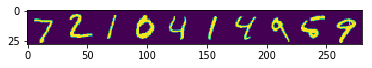

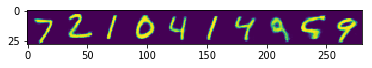

[EPOCH 1 / STEP 31]
TRAIN loss   : 45973.8320
RECON loss   : 35348.6992
KL    loss   : 10625.1123
[EPOCH 3 / STEP 33]
TRAIN loss   : 45908.9648
RECON loss   : 35284.4180
KL    loss   : 10624.5508


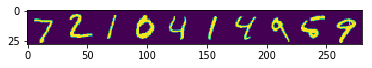

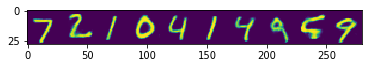

[EPOCH 1 / STEP 34]
TRAIN loss   : 45847.2656
RECON loss   : 35236.9727
KL    loss   : 10610.3252
[EPOCH 3 / STEP 36]
TRAIN loss   : 45770.2109
RECON loss   : 35157.9570
KL    loss   : 10612.2832


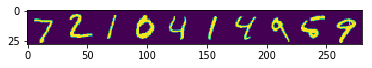

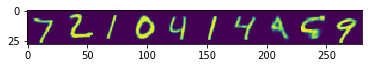

[EPOCH 1 / STEP 37]
TRAIN loss   : 45729.6953
RECON loss   : 35116.0234
KL    loss   : 10613.6436
[EPOCH 3 / STEP 39]
TRAIN loss   : 45640.6758
RECON loss   : 35034.5391
KL    loss   : 10606.1357


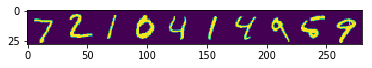

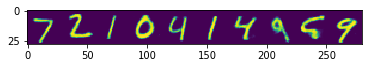

[EPOCH 1 / STEP 40]
TRAIN loss   : 45651.4180
RECON loss   : 35034.3164
KL    loss   : 10617.0830
[EPOCH 3 / STEP 42]
TRAIN loss   : 45517.4023
RECON loss   : 34905.5820
KL    loss   : 10611.8584


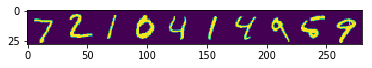

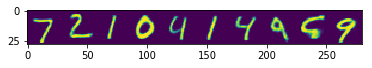

[EPOCH 1 / STEP 43]
TRAIN loss   : 45492.0586
RECON loss   : 34886.5664
KL    loss   : 10605.5215
[EPOCH 3 / STEP 45]
TRAIN loss   : 45466.2852
RECON loss   : 34853.2266
KL    loss   : 10613.0596


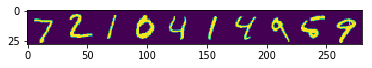

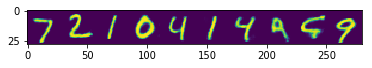

[EPOCH 1 / STEP 46]
TRAIN loss   : 45432.9219
RECON loss   : 34829.8711
KL    loss   : 10603.0508
[EPOCH 3 / STEP 48]
TRAIN loss   : 45366.9609
RECON loss   : 34770.3164
KL    loss   : 10596.6523


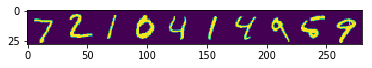

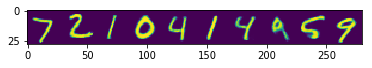

[EPOCH 1 / STEP 49]
TRAIN loss   : 45364.2422
RECON loss   : 34758.3555
KL    loss   : 10605.8682
[EPOCH 3 / STEP 51]
TRAIN loss   : 45252.1172
RECON loss   : 34660.5703
KL    loss   : 10591.5488


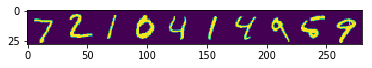

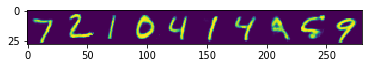

[EPOCH 1 / STEP 52]
TRAIN loss   : 45248.5352
RECON loss   : 34655.7734
KL    loss   : 10592.7793
[EPOCH 3 / STEP 54]
TRAIN loss   : 45219.1875
RECON loss   : 34633.8086
KL    loss   : 10585.3574


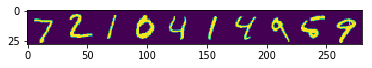

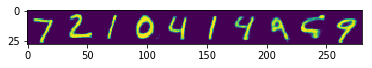

[EPOCH 1 / STEP 55]
TRAIN loss   : 45200.8555
RECON loss   : 34617.3672
KL    loss   : 10583.4814
[EPOCH 3 / STEP 57]
TRAIN loss   : 45144.1211
RECON loss   : 34561.7227
KL    loss   : 10582.4023


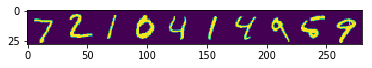

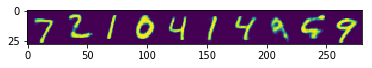

[EPOCH 1 / STEP 58]
TRAIN loss   : 45127.3242
RECON loss   : 34538.2344
KL    loss   : 10589.1201
[EPOCH 3 / STEP 60]
TRAIN loss   : 45087.1250
RECON loss   : 34521.0469
KL    loss   : 10566.0732


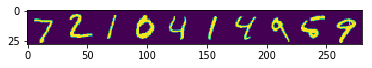

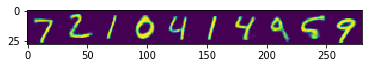

[EPOCH 1 / STEP 61]
TRAIN loss   : 45032.0781
RECON loss   : 34465.1797
KL    loss   : 10566.8965
[EPOCH 3 / STEP 63]
TRAIN loss   : 45035.8438
RECON loss   : 34454.3438
KL    loss   : 10581.5098


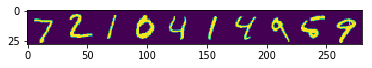

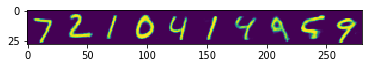

[EPOCH 1 / STEP 64]
TRAIN loss   : 44971.6133
RECON loss   : 34406.8594
KL    loss   : 10564.7588
[EPOCH 3 / STEP 66]
TRAIN loss   : 44938.7188
RECON loss   : 34374.1094
KL    loss   : 10564.5732


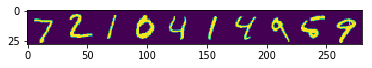

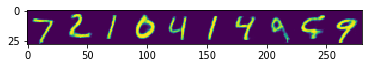

[EPOCH 1 / STEP 67]
TRAIN loss   : 44934.4453
RECON loss   : 34361.3047
KL    loss   : 10573.1279
[EPOCH 3 / STEP 69]
TRAIN loss   : 44907.7852
RECON loss   : 34356.3594
KL    loss   : 10551.4160


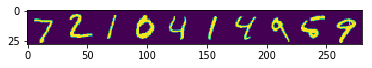

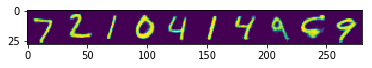

[EPOCH 1 / STEP 70]
TRAIN loss   : 44908.4180
RECON loss   : 34344.3789
KL    loss   : 10564.0566
[EPOCH 3 / STEP 72]
TRAIN loss   : 44854.4531
RECON loss   : 34300.7969
KL    loss   : 10553.6270


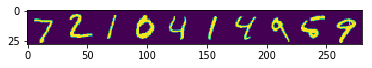

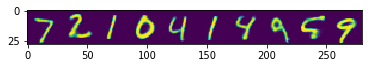

[EPOCH 1 / STEP 73]
TRAIN loss   : 44828.2773
RECON loss   : 34277.7617
KL    loss   : 10550.5205
[EPOCH 3 / STEP 75]
TRAIN loss   : 44767.9062
RECON loss   : 34223.6484
KL    loss   : 10544.2637


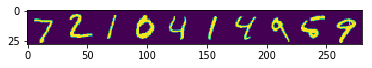

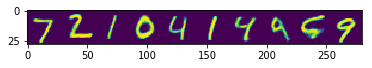

KeyboardInterrupt: 

In [12]:
# if you want to train
for i in range(5):
    vae.fit(ds_train, saving=True, epochs=3, batch_size=128, verbose=3)
    origtest()

In [19]:
def randomtest():
    z = tf.random_normal((10, z_dim))
    _, x_decode = vae.decoding(z)
    img_test = x_decode.numpy().reshape(-1,28,28)
    img_test = np.concatenate(img_test, axis=1)
            
    plt.imshow(img_test)
    plt.show()

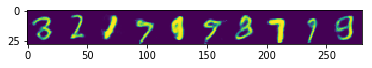

In [95]:
randomtest()

In [80]:
def noisetest(num):
    num_sample = np.array([x_test[i] for i in range(len(x_test)) if y_test[i] == num])/255.  
    num_sample = num_sample.reshape(-1,28*28)
    input_sample = tf.convert_to_tensor(num_sample)
    mu, logsigma = vae.encoding(num_sample)

    z = vae.sampling_z(mu, logsigma)
    z = tf.reduce_mean(z, axis=0)
    z = tf.reshape(z, (1,128))
    
    _, x_decode = vae.decoding(z)
    img_test = x_decode.numpy().reshape(-1,28,28)
    img_test = np.concatenate(img_test, axis=1)
    
    plt.imshow(img_test)
    plt.show()

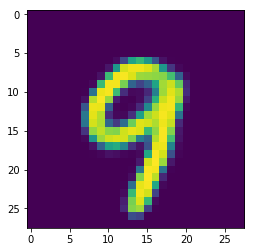

In [97]:
noisetest(9)